Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                768       
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 6)                 198       
                                                                 
Total params: 3046 (11.90 KB)
Trainable params: 3046 (11.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


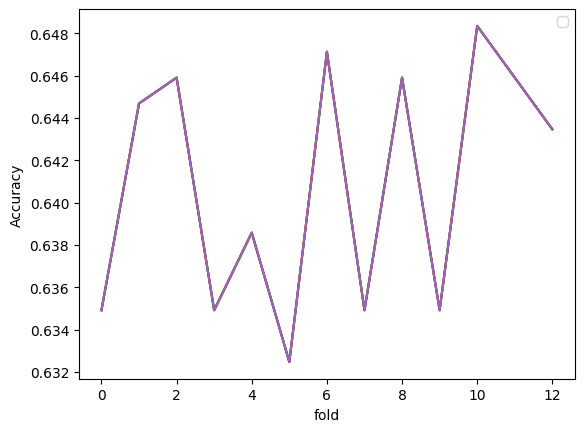

Test Set Accuracy: [0.9501427412033081, 0.606249988079071]


In [13]:
  from google.colab import drive
  import pandas as pd
  from sklearn.model_selection import train_test_split, KFold
  from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
  from sklearn.metrics import accuracy_score
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Dense
  from tensorflow.keras.callbacks import EarlyStopping
  import matplotlib.pyplot as plt

  drive.mount('/content/drive', force_remount=True)

  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/winequality-red.csv', header=0)

  X = df.drop('quality', axis=1)
  y = df['quality']

  encoder = OneHotEncoder(sparse=False)
  y_one_hot = encoder.fit_transform(y.values.reshape(-1, 1))

  scaler = MinMaxScaler()
  X_normalized = scaler.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_one_hot, test_size=0.2, shuffle=True)

  model = Sequential()
  model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(y_one_hot.shape[1], activation='softmax'))
  model.summary()

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

  kfold = KFold(n_splits=5, shuffle=True)

  fold_accuracies = []

  for fold, (train_index, test_index) in enumerate(kfold.split(X_train)):
      X_fold_train, X_fold_test = X_train[train_index], X_train[test_index]
      y_fold_train, y_fold_test = y_train[train_index], y_train[test_index]

      history = model.fit(X_fold_train, y_fold_train, epochs=100, batch_size=64, verbose=0, validation_split=0.2, callbacks=[early_stopping])

      accuracy = model.evaluate(X_fold_test, y_fold_test, verbose=0)
      fold_accuracies.append(accuracy)

  for i, acc in enumerate(fold_accuracies, 1):
    plt.plot(history.history['accuracy'])

  plt.xlabel('fold')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  accuracy_test = model.evaluate(X_test, y_test, verbose=0)
  print(f'Test Set Accuracy: {accuracy_test}')